# Plotting and plotstyles

Plotting and visualizing data is an integral part of data analysis.
pyfar provides functions to plot time signals, frequency spectra, and to create other related data plots.
These can be used to inspect the data or generate scientific plots.

Under the hood, pyfar uses the matplotlib library for plotting.
This allows for a high degree of customization in the creation of figures.
This notebook provides an overview of the plotting functions and how they can be used to customize the plots for your use-cases.
For more details on the plotting functions, please refer to the [documentation](https://pyfar.readthedocs.io/en/stable/modules/pyfar.plot.html).

pyfar also adds interactive features to the plots for inspection, 
for example, zooming and cycling through channels.
This can be tested in the [interactive plots](./pyfar_interactive_plots.ipynb) notebook.

## Line plots

First, we will import pyfar and create a time signal to plot.

In [1]:
import pyfar as pf
import numpy as np
import matplotlib.pyplot as plt

# set matplotlib backend for plotting
%matplotlib inline

# 1024 samples sine sweep between 100 and 500 Hz
sweep = pf.signals.exponential_sweep_time(2**10, [100, 500])

For a simple time plot, we can use

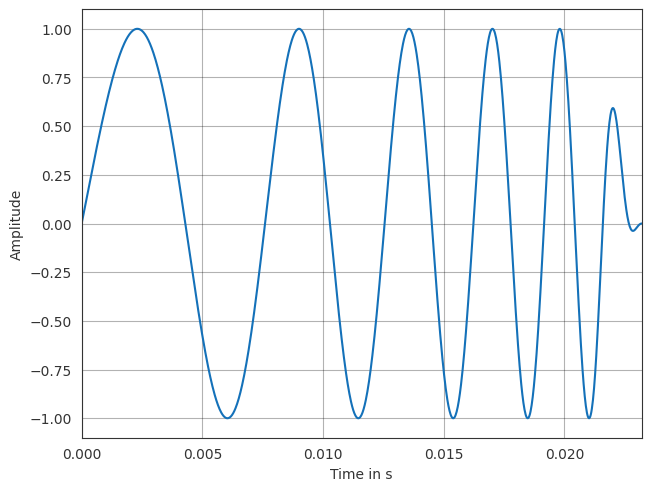

In [2]:
pf.plot.time(sweep)
plt.show()

Note, that the plot is styled using the default settings of pyfar.
Checkout the [styling plots section](#styling-plots) for more information on what is changed exactly.

The plot can be customized using pyfar specific arguments as well as matplotlib specific arguments.

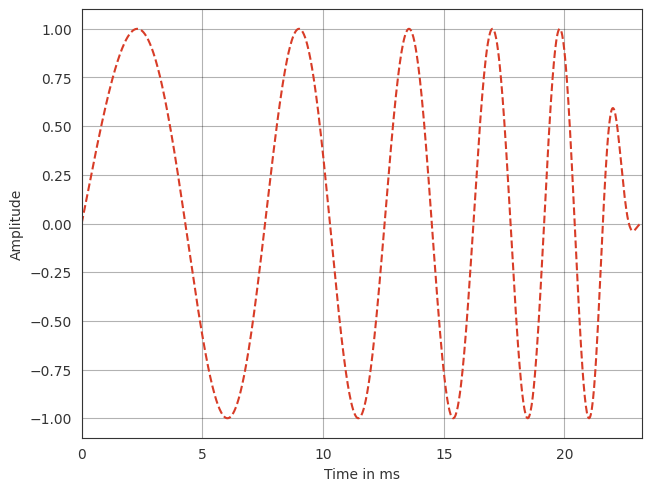

In [3]:
pf.plot.time(sweep,
                # pyfar arguments
                unit="ms",
                # matplotlib arguments
                color="r",
                linestyle="--",
            )
plt.show()

Changes can also be made directly using the matplotlib functions.
For this, pyfar returns the axis objects.

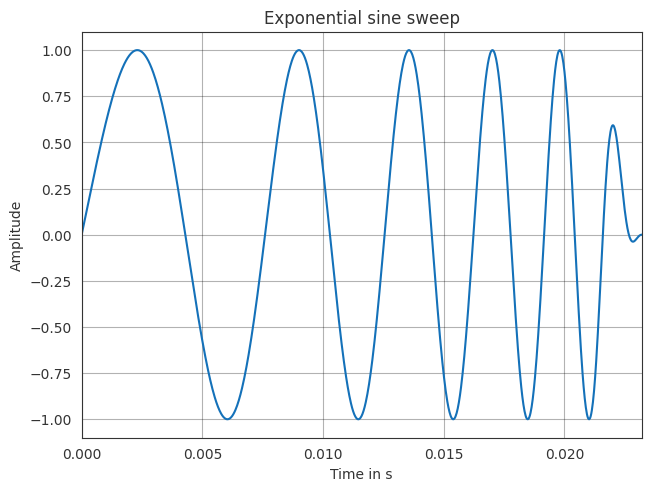

In [4]:
ax = pf.plot.time(sweep)

ax.set_title("Exponential sine sweep")
plt.show()

pyfar also supports plotting multiple signals in one figure.

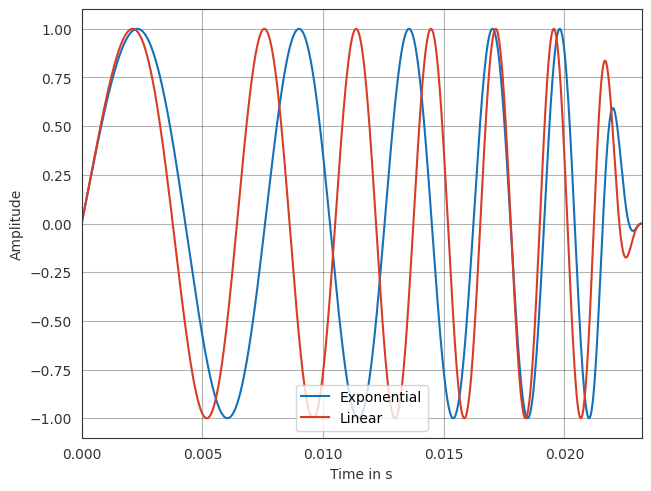

In [5]:
lin_sweep = pf.signals.linear_sweep_time(2**10, [100, 500])

ax = pf.plot.time(sweep, label="Exponential")
ax = pf.plot.time(lin_sweep, label="Linear")
ax.legend(loc="lower center")
plt.show()

`pyfar.Signal` and `pyfar.FrequencyData` objects can also be plotted in the frequency domain.
Note, that the FFT norm is taken into account when plotting the frequency domain see [the notebook on FFT normalization](https://pyfar-gallery.readthedocs.io/en/latest/gallery/interactive/fast_fourier_transform.html) for more information on this.

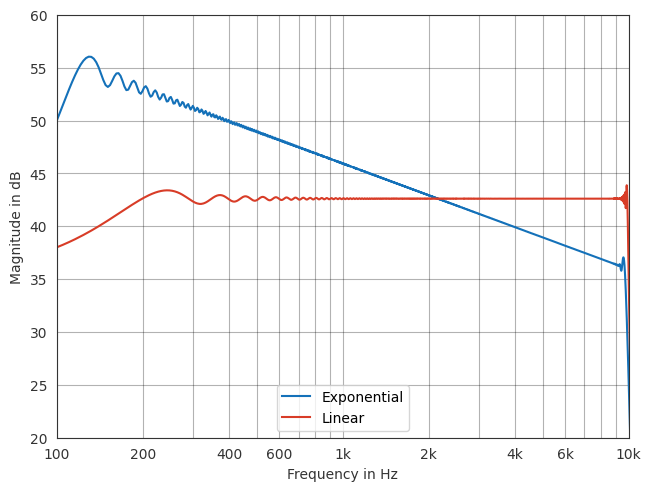

In [6]:
sweep = pf.signals.exponential_sweep_time(2**14, [100, 10000])
lin_sweep = pf.signals.linear_sweep_time(2**14, [100, 10000])

ax = pf.plot.freq(sweep, label="Exponential")
ax = pf.plot.freq(lin_sweep, label="Linear")
ax.legend(loc="lower center")
ax.set_xlim(100, 10000)
ax.set_ylim(20, 60)
plt.show()

There are also convenient functions to plot the time signal and the frequency spectrum.

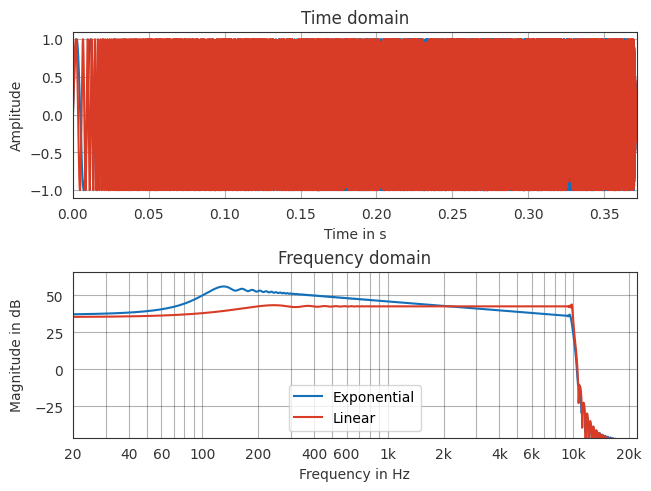

In [7]:
ax = pf.plot.time_freq(sweep, label="Exponential")
ax = pf.plot.time_freq(lin_sweep, label="Linear")
ax[0].set_title("Time domain")
ax[1].set_title("Frequency domain")
ax[1].legend(loc="lower center")
plt.show()

Note, that the plot function now returns an array of axis objects.
One for each subplot.

### Spectrograms

`pyfar` also provides functions to create spectrograms.

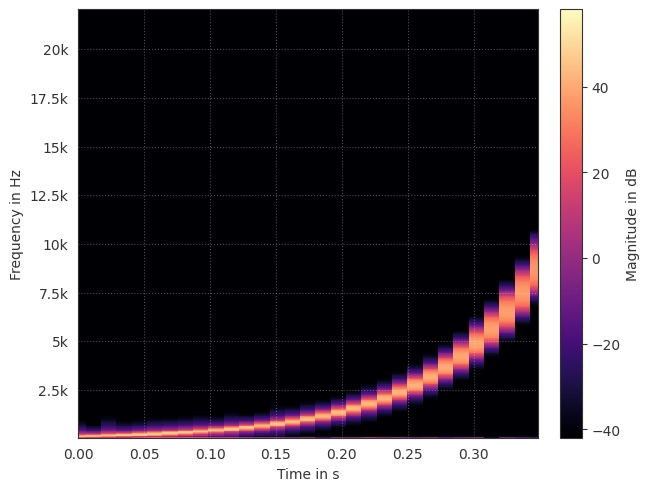

In [8]:
pf.plot.spectrogram(sweep)
plt.show()

Similar to the line plots, the spectrogram can be customized using pyfar specific arguments as well as matplotlib specific arguments.
Note, that either [`matplotlib.pyplot.pcolormesh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) or [`matplotlib.pyplot.contourf()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) is used depending on the selected `method`.
As such, also the available arguments might change.

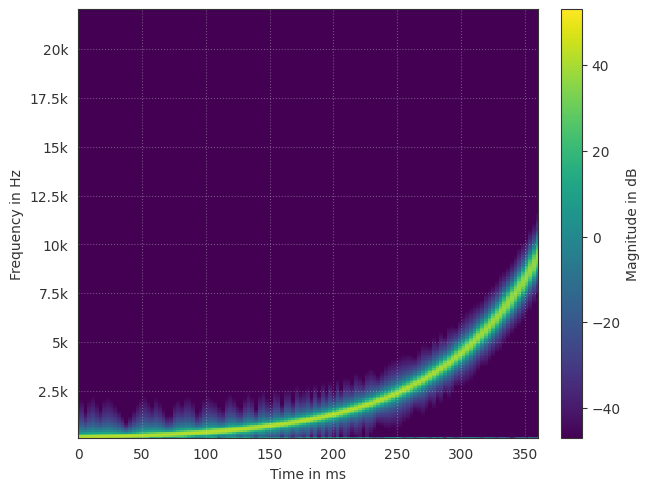

In [9]:
pf.plot.spectrogram(sweep,
                    # pyfar arguments
                    window_overlap_fct =0.75,
                    window_length=2**9,
                    unit="ms",
                    # matplotlib arguments
                    cmap="viridis",
                )
plt.show()

## 2D plots

There are also functions to plot a multi-channel `pyfar.Signal` in 2D.
All line plots have such a corresponding 2D plot method.

Let us take a look how this can help us to visualize the data.
First, we will create a multi-channel impulse signal with different time delays and amplitudes across channels.

In [10]:
sample_delays = np.rint(8 * np.sin(np.linspace(0, 2*np.pi, 25))).astype(int) + 32
impulses = pf.signals.impulse(64, sample_delays, np.linspace(1, .5, 25))

If we plot this using the line plots, this can sometimes be hard to interpret.

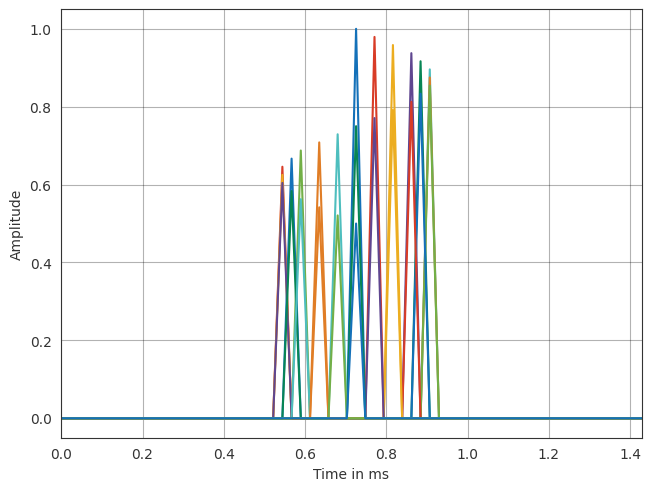

In [11]:
pf.plot.time(impulses, unit='ms')
plt.show()

Using the 2D plots, the data is visualized in a more intuitive way.

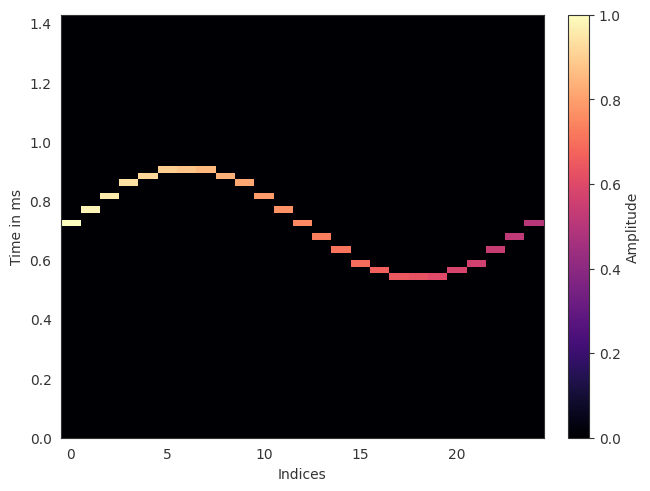

In [12]:
pf.plot.time_2d(impulses, unit='ms')
plt.show()

## Styling plots

From the plots above, you might have noticed that the plots look different from the default matplotlib style.
This is because pyfar changes the default style of matplotlib towards a more convenient style for acoustic research.
Some of the changes include:

- Grid enabled by default
- Frequency axis with adapted tick locations
- Custom color cycle, wich also overwrites the default matplotlib colors (e.g. `'r'` results in the red defined by [pyfar.plot.color](https://pyfar.readthedocs.io/en/stable/modules/pyfar.plot.html#pyfar.plot.color))

Furthermore, pyfar includes two pyfar-specific plot styles: _light_ and _dark_.
The default style is _light_.

The pyfar plot functions accept a `style` argument to change the style.

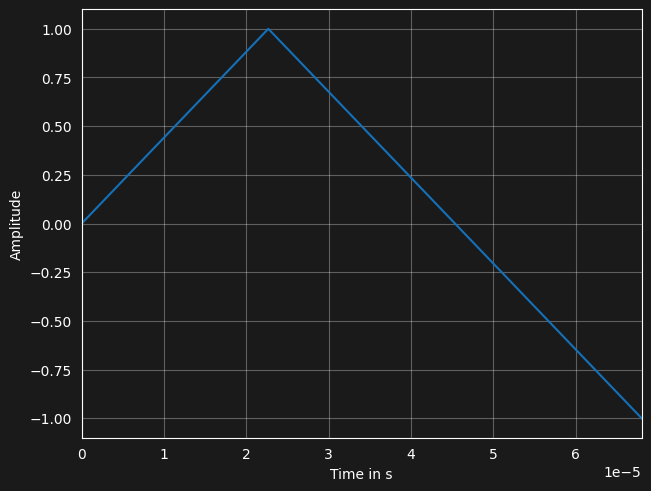

In [13]:
signal = pf.Signal([0, 1, 0, -1], 44100)

pf.plot.time(signal, style="dark")
plt.show()

The overall style can be temporarily changed using `pyfar.plot.context` which is a wrapper around `matplotlib.context`

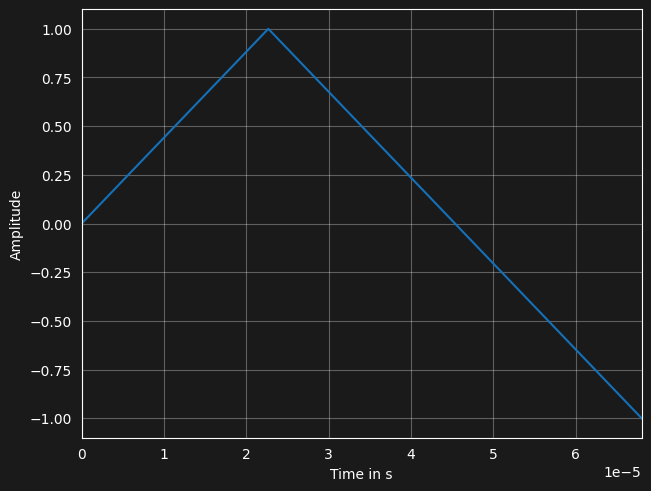

In [14]:
with pf.plot.context(style="dark"):
    # this plot uses the dark style
    fig, ax = plt.subplots(1, 1)
    pf.plot.time(signal, ax=ax)
plt.show()

# plots outside the `with` context would use the standard style again

This overall change in style can also be made permanent with the `pf.plot.use()` function like this:

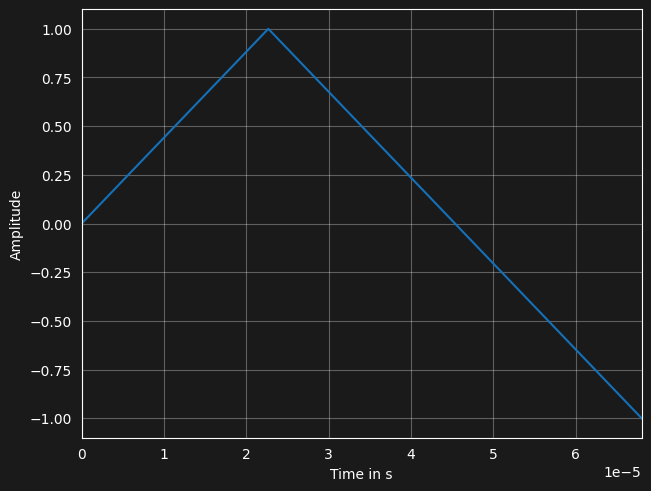

In [15]:
pf.plot.use(style="dark")
fig, ax = plt.subplots(1, 1)
pf.plot.time(signal, ax=ax)
plt.show()

# License notice
This notebook © 2024 by [the pyfar developers](https://github.com/orgs/pyfar/people) is licensed under [CC BY 4.0](http://creativecommons.org/licenses/by/4.0/?ref=chooser-v1)

![CC BY Large](../../resources/cc-by.svg)


# Watermark

In [16]:
%load_ext watermark
%watermark -v -m -iv

Python implementation: CPython
Python version       : 3.10.17
IPython version      : 8.37.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1029-aws
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

numpy     : 2.2.6
pyfar     : 0.7.3
matplotlib: 3.10.7

